In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/boxofficecollections/BoxOfficeCollections.csv')
df.head()

,Movie,Year,Score,Adjusted Score,Director,Cast,Consensus,Box Office Collection,Imdb_genre,IMDB Rating,metascore,time_minute,Votes
0,Hot Rod,2007,39,42.918,Akiva Schaffer,"Andy Samberg, Jorma Taccone, Bill Hader, Danny...","For Rod Kimball (Andy Samberg), performing stu...",14371564.0,Comedy,6.7,43.0,88.0,84956.0
1,Game Night,2018,85,99.838,John Francis Daley,"Jason Bateman, Rachel McAdams, Kyle Chandler, ...",Max and Annie's weekly game night gets kicked ...,117378084.0,Comedy,6.9,66.0,100.0,229292.0
2,The First Wives Club,1996,49,53.174,Hugh Wilson,"Goldie Hawn, Bette Midler, Diane Keaton, Maggi...",Despondent over the marriage of her ex-husband...,181489203.0,Comedy,6.4,58.0,103.0,48413.0
3,Scary Movie,2000,52,54.973,Keenen Ivory Wayans,"Shawn Wayans, Marlon Wayans, Cheri Oteri, Shan...","Defying the very notion of good taste, Scary M...",277200000.0,Comedy,6.2,48.0,88.0,254927.0
4,Blockers,2018,84,96.883,Kay Cannon,"Leslie Mann, Ike Barinholtz, John Cena, Kathry...","Julie, Kayla and Sam are three high school sen...",94523781.0,Comedy,6.2,69.0,102.0,78498.0


### We will try 2 techniques- 

1. Without using Encoding
2. Using Encoding

### Removing some columns that I believe are irrelevant

In [82]:
df = df.drop(['Consensus','time_minute','Director','Year','Cast','Movie'],axis=1)
df.head()

,Score,Adjusted Score,Box Office Collection,Imdb_genre,IMDB Rating,metascore,Votes
0,39,42.918,14371564.0,Comedy,6.7,43.0,84956.0
1,85,99.838,117378084.0,Comedy,6.9,66.0,229292.0
2,49,53.174,181489203.0,Comedy,6.4,58.0,48413.0
3,52,54.973,277200000.0,Comedy,6.2,48.0,254927.0
4,84,96.883,94523781.0,Comedy,6.2,69.0,78498.0


In [16]:
df.shape

(1378, 7)

In [17]:
df.tail(20)

,Score,Adjusted Score,Box Office Collection,Imdb_genre,IMDB Rating,metascore,Votes
1358,100,103.012,296334.0,Drama,8.1,NaN,131448.0
1359,100,101.913,390789.0,NaN,NaN,NaN,NaN
1360,100,101.007,5052469.0,NaN,NaN,NaN,NaN
1361,100,103.006,NaN,NaN,NaN,NaN,NaN
1362,100,105.304,NaN,NaN,NaN,NaN,NaN
1363,100,105.082,NaN,Comedy,7.9,87.0,18557.0
1364,100,103.380,304472.0,NaN,NaN,NaN,NaN
1365,100,103.398,NaN,NaN,NaN,NaN,NaN
1366,100,102.335,NaN,NaN,NaN,NaN,NaN
1367,100,101.270,NaN,Drama,8.1,100.0,101519.0


In [18]:
df.isnull().sum()

Score                      0
Adjusted Score             0
Box Office Collection    416
Imdb_genre               354
IMDB Rating              363
metascore                452
Votes                    363
dtype: int64

In [83]:
df = df.drop_duplicates()

In [21]:
df.duplicated().sum()

0

In [22]:
df.head()

,Score,Adjusted Score,Box Office Collection,Imdb_genre,IMDB Rating,metascore,Votes
0,39,42.918,14371564.0,Comedy,6.7,43.0,84956.0
1,85,99.838,117378084.0,Comedy,6.9,66.0,229292.0
2,49,53.174,181489203.0,Comedy,6.4,58.0,48413.0
3,52,54.973,277200000.0,Comedy,6.2,48.0,254927.0
4,84,96.883,94523781.0,Comedy,6.2,69.0,78498.0


In [84]:
df = df.dropna()
df.shape

(759, 7)

In [25]:
df.head()

,Score,Adjusted Score,Box Office Collection,Imdb_genre,IMDB Rating,metascore,Votes
0,39,42.918,14371564.0,Comedy,6.7,43.0,84956.0
1,85,99.838,117378084.0,Comedy,6.9,66.0,229292.0
2,49,53.174,181489203.0,Comedy,6.4,58.0,48413.0
3,52,54.973,277200000.0,Comedy,6.2,48.0,254927.0
4,84,96.883,94523781.0,Comedy,6.2,69.0,78498.0


In [26]:
df.Imdb_genre.unique()

array(['Comedy', 'Thriller', 'Adventure', 'Drama', 'Sci-Fi', 'Horror'],
      dtype=object)

In [85]:
df.Imdb_genre = df.Imdb_genre.replace(['Comedy', 'Thriller', 'Adventure', 'Drama', 'Sci-Fi', 'Horror'],[1,2,3,4,5,6])
df.head()

,Score,Adjusted Score,Box Office Collection,Imdb_genre,IMDB Rating,metascore,Votes
0,39,42.918,14371564.0,1,6.7,43.0,84956.0
1,85,99.838,117378084.0,1,6.9,66.0,229292.0
2,49,53.174,181489203.0,1,6.4,58.0,48413.0
3,52,54.973,277200000.0,1,6.2,48.0,254927.0
4,84,96.883,94523781.0,1,6.2,69.0,78498.0


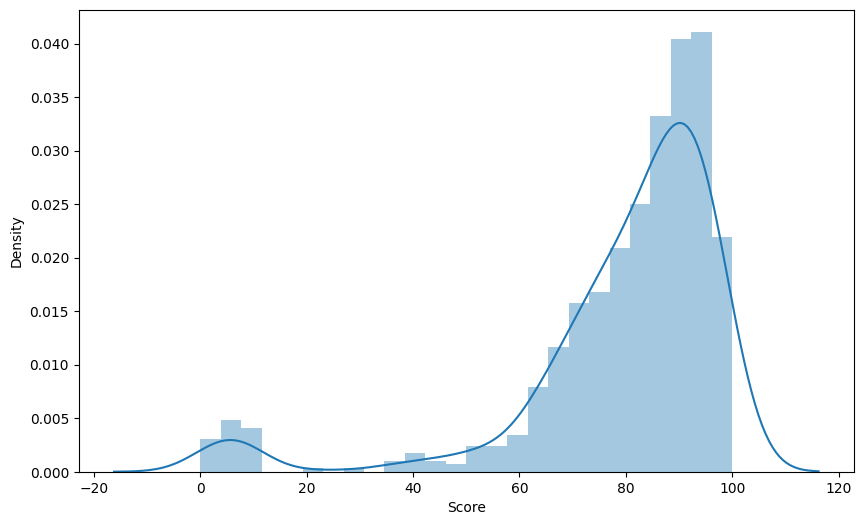

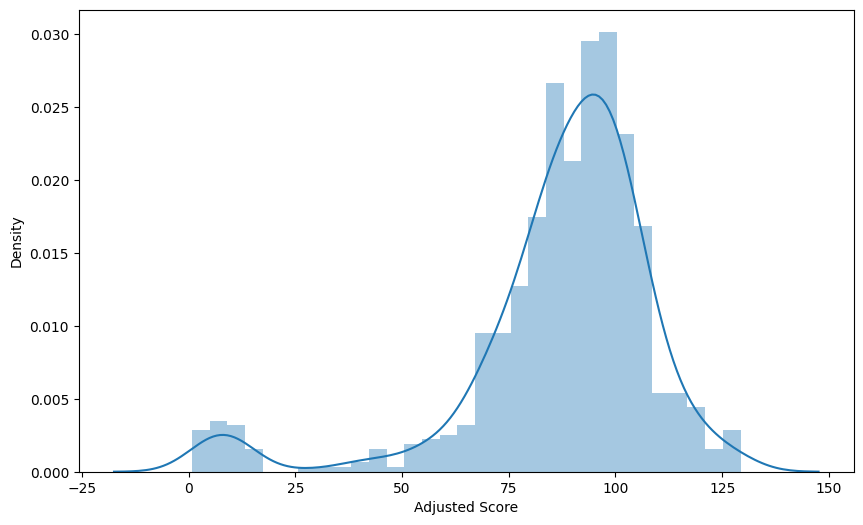

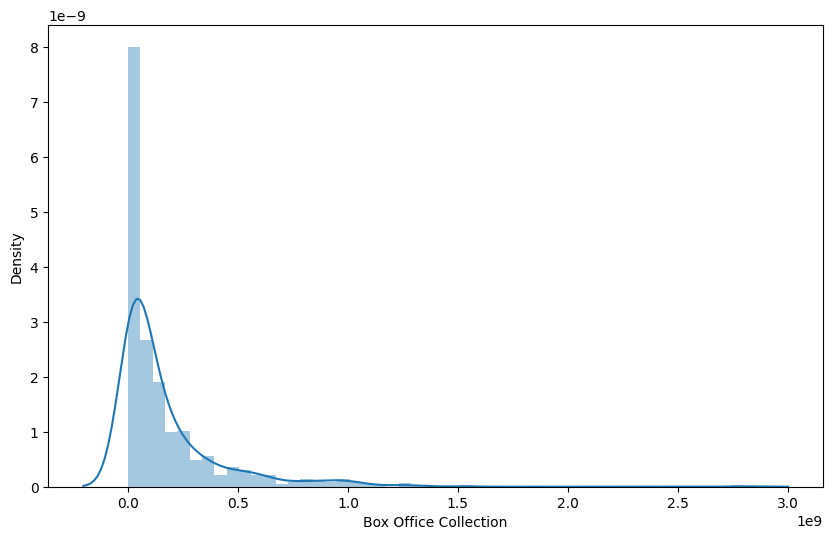

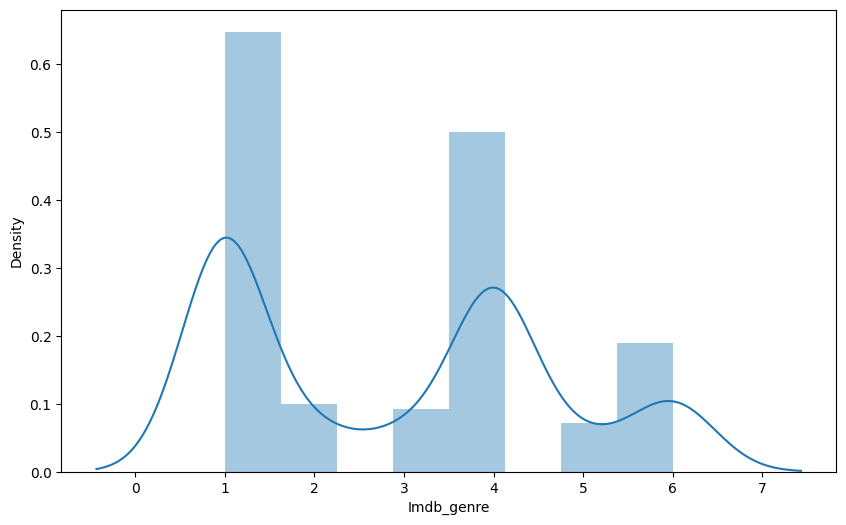

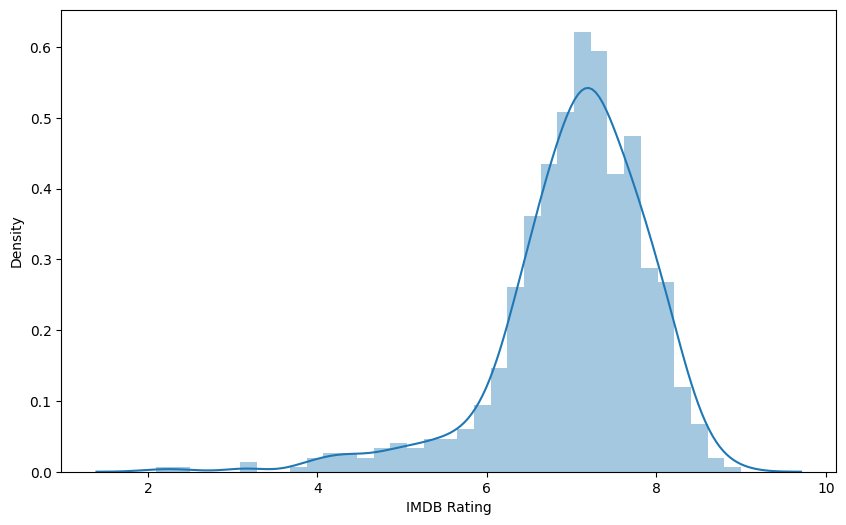

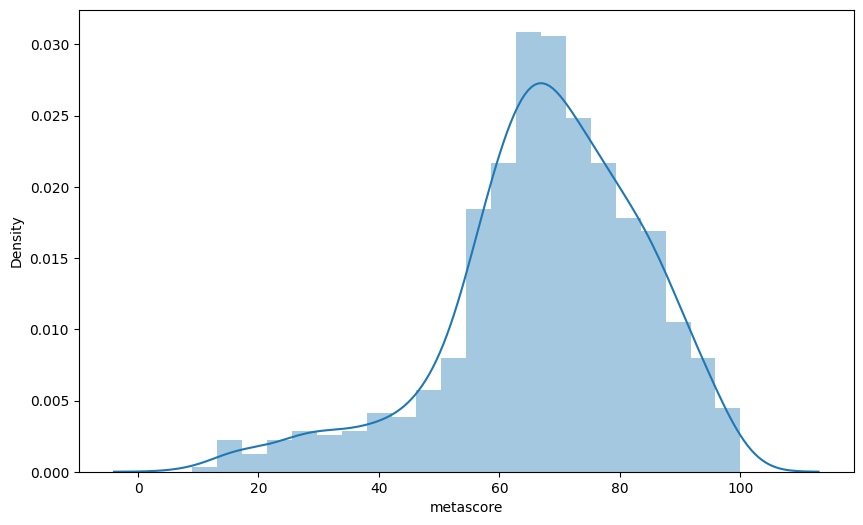

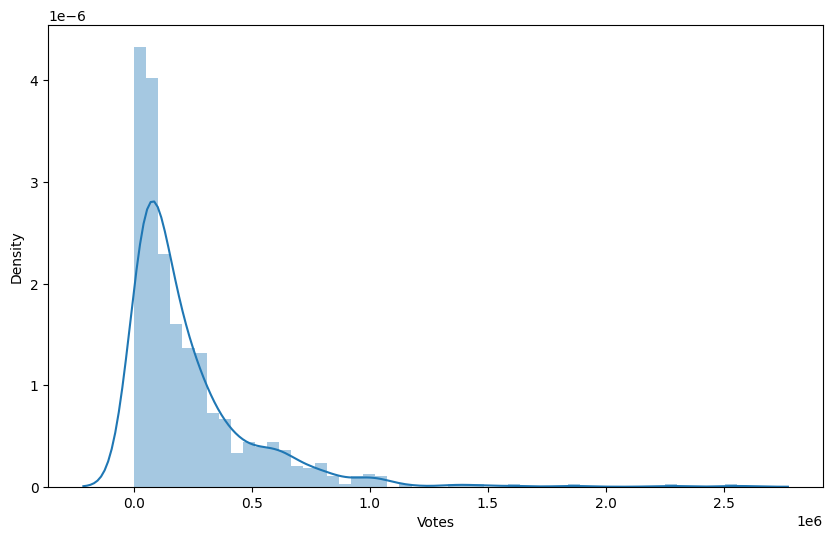

In [28]:

#check dist of all columns
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.distplot(df[col])
  plt.show()

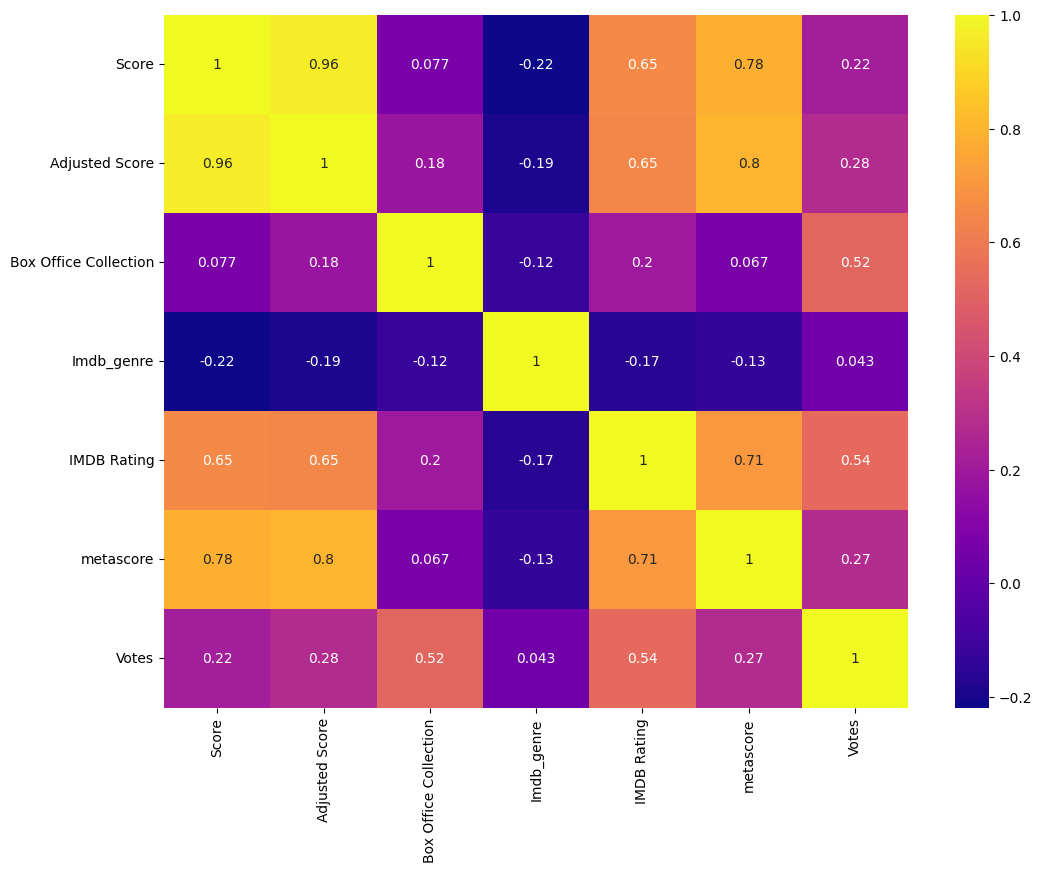

In [29]:
#check the correlation

corr = df.corr()

plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

In [86]:
#Now splitting the dataset

x = df.drop(['Score'],axis=1)
y = df['Score']

#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)
r.fit(x_train_scaled,y_train)

Ridge()

In [87]:
l.fit(x_train_scaled,y_train)
en.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [88]:
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
knn.fit(x_train_scaled,y_train)
svr.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)

In [ ]:
lgb.fit(x_train_scaled,y_train)
gpr.fit(x_train_scaled,y_train)

In [91]:
#preds
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
svrpred = svr.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
gprpred = gpr.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)
svrr2 = r2_score(y_test,svrpred)
catr2 = r2_score(y_test,catpred)
lgbr2 = r2_score(y_test,lgbpred)
gprr2 = r2_score(y_test,gprpred)

print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)
print('SVR',svrr2)
print('CAT',catr2)
print('LIGHTGBM',lgbr2)
print('GUASSIAN PROCESS',gprr2)

LINEAR REG  0.9179535336887655
RIDGE  0.9178883518343979
LASSO  0.9132082856180221
ELASTICNET 0.7798060034754408
RANDOM FOREST  0.966112440206426
GB 0.965561284024171
ADABOOST 0.9480065963747106
XGB 0.9622280982578579
KNN 0.8664261337713295
SVR 0.6352444839315405
CAT 0.9621645445142799
LIGHTGBM 0.9648072411349449
GUASSIAN PROCESS -1.8335040850027253


In [39]:
#(TO CHECK IF THE MODEL HAS OVERFITTED OR UNDERFITTED)

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(estimator=rf,X=x_train_scaled,y=y_train)
print('Cross Val Acc Score of RANDOM FOREST model is ---> ',cross_val)
print('\n Cross Val Mean Acc Score of RANDOM FOREST model is ---> ',cross_val.mean())

Cross Val Acc Score of RANDOM FOREST model is --->  [-0.09565587  0.38959944  0.50194554  0.3828822   0.30071533]

 Cross Val Mean Acc Score of RANDOM FOREST model is --->  0.29589732764156207


### Now we will use 2nd Technique that involves Encoding

In [70]:
df.head()

,Movie,Year,Score,Adjusted Score,Director,Cast,Consensus,Box Office Collection,Imdb_genre,IMDB Rating,metascore,time_minute,Votes
0,Hot Rod,2007,39,42.918,Akiva Schaffer,"Andy Samberg, Jorma Taccone, Bill Hader, Danny...","For Rod Kimball (Andy Samberg), performing stu...",14371564.0,Comedy,6.7,43.0,88.0,84956.0
1,Game Night,2018,85,99.838,John Francis Daley,"Jason Bateman, Rachel McAdams, Kyle Chandler, ...",Max and Annie's weekly game night gets kicked ...,117378084.0,Comedy,6.9,66.0,100.0,229292.0
2,The First Wives Club,1996,49,53.174,Hugh Wilson,"Goldie Hawn, Bette Midler, Diane Keaton, Maggi...",Despondent over the marriage of her ex-husband...,181489203.0,Comedy,6.4,58.0,103.0,48413.0
3,Scary Movie,2000,52,54.973,Keenen Ivory Wayans,"Shawn Wayans, Marlon Wayans, Cheri Oteri, Shan...","Defying the very notion of good taste, Scary M...",277200000.0,Comedy,6.2,48.0,88.0,254927.0
4,Blockers,2018,84,96.883,Kay Cannon,"Leslie Mann, Ike Barinholtz, John Cena, Kathry...","Julie, Kayla and Sam are three high school sen...",94523781.0,Comedy,6.2,69.0,102.0,78498.0


In [71]:
df = df.drop(['Consensus','time_minute','Director','Year','Cast','Movie'],axis=1)
df.head()

,Score,Adjusted Score,Box Office Collection,Imdb_genre,IMDB Rating,metascore,Votes
0,39,42.918,14371564.0,Comedy,6.7,43.0,84956.0
1,85,99.838,117378084.0,Comedy,6.9,66.0,229292.0
2,49,53.174,181489203.0,Comedy,6.4,58.0,48413.0
3,52,54.973,277200000.0,Comedy,6.2,48.0,254927.0
4,84,96.883,94523781.0,Comedy,6.2,69.0,78498.0


In [46]:
df.isnull().sum()

Score                      0
Adjusted Score             0
Box Office Collection    416
Imdb_genre               354
IMDB Rating              363
metascore                452
Votes                    363
dtype: int64

In [57]:
#df['Box Office Collection'].mean()
#df['Imdb_genre'].mode()
#df['IMDB Rating'].mean()
#df['metascore'].mean()
#df['Votes'].mean()

203507.88571428572

In [72]:
df['Box Office Collection'] = df['Box Office Collection'].fillna(145436120.5)
df['Imdb_genre'] = df['Imdb_genre'].fillna('Normal')
df['IMDB Rating'] = df['IMDB Rating'].fillna(7.0)
df['metascore'] = df['metascore'].fillna(68.7)
df['Votes'] = df['Votes'].fillna(203507.8)
df.head()

,Score,Adjusted Score,Box Office Collection,Imdb_genre,IMDB Rating,metascore,Votes
0,39,42.918,14371564.0,Comedy,6.7,43.0,84956.0
1,85,99.838,117378084.0,Comedy,6.9,66.0,229292.0
2,49,53.174,181489203.0,Comedy,6.4,58.0,48413.0
3,52,54.973,277200000.0,Comedy,6.2,48.0,254927.0
4,84,96.883,94523781.0,Comedy,6.2,69.0,78498.0


In [73]:
df = df.join(pd.get_dummies(df.Imdb_genre).astype(int))

df.head()

,Score,Adjusted Score,Box Office Collection,Imdb_genre,IMDB Rating,metascore,Votes,Adventure,Comedy,Drama,Horror,Normal,Sci-Fi,Thriller
0,39,42.918,14371564.0,Comedy,6.7,43.0,84956.0,0,1,0,0,0,0,0
1,85,99.838,117378084.0,Comedy,6.9,66.0,229292.0,0,1,0,0,0,0,0
2,49,53.174,181489203.0,Comedy,6.4,58.0,48413.0,0,1,0,0,0,0,0
3,52,54.973,277200000.0,Comedy,6.2,48.0,254927.0,0,1,0,0,0,0,0
4,84,96.883,94523781.0,Comedy,6.2,69.0,78498.0,0,1,0,0,0,0,0


In [74]:
df = df.drop(['Imdb_genre'],axis=1)
df.head()

,Score,Adjusted Score,Box Office Collection,IMDB Rating,metascore,Votes,Adventure,Comedy,Drama,Horror,Normal,Sci-Fi,Thriller
0,39,42.918,14371564.0,6.7,43.0,84956.0,0,1,0,0,0,0,0
1,85,99.838,117378084.0,6.9,66.0,229292.0,0,1,0,0,0,0,0
2,49,53.174,181489203.0,6.4,58.0,48413.0,0,1,0,0,0,0,0
3,52,54.973,277200000.0,6.2,48.0,254927.0,0,1,0,0,0,0,0
4,84,96.883,94523781.0,6.2,69.0,78498.0,0,1,0,0,0,0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Score                  1378 non-null   int64  
 1   Adjusted Score         1378 non-null   float64
 2   Box Office Collection  1378 non-null   float64
 3   IMDB Rating            1378 non-null   float64
 4   metascore              1378 non-null   float64
 5   Votes                  1378 non-null   float64
 6   Adventure              1378 non-null   int64  
 7   Comedy                 1378 non-null   int64  
 8   Drama                  1378 non-null   int64  
 9   Horror                 1378 non-null   int64  
 10  Normal                 1378 non-null   int64  
 11  Sci-Fi                 1378 non-null   int64  
 12  Thriller               1378 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 140.1 KB


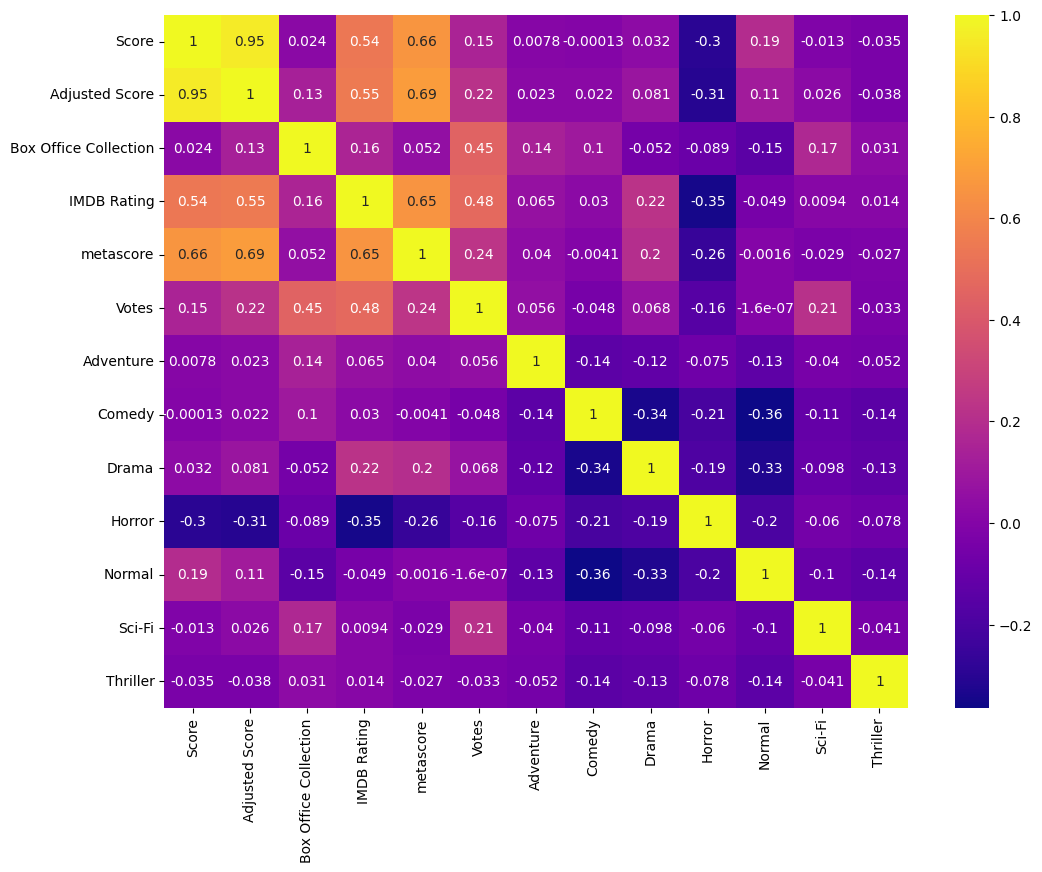

In [76]:
#check the correlation

corr = df.corr()

plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

In [ ]:
x = df.drop(['Score'],axis=1)
y = df['Score']

#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

#model selection
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
import lightgbm as lgbm
from sklearn.gaussian_process import GaussianProcessRegressor


lr = LinearRegression()
r = Ridge()
l = Lasso()
en = ElasticNet()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
adb = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
svr = SVR()
cat = CatBoostRegressor()
lgb =lgbm.LGBMRegressor()
gpr = GaussianProcessRegressor()

#Fittings
lr.fit(x_train_scaled,y_train)
r.fit(x_train_scaled,y_train)
l.fit(x_train_scaled,y_train)
en.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)
gb.fit(x_train_scaled,y_train)
adb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)
svr.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train)
lgb.fit(x_train_scaled,y_train)
gpr.fit(x_train_scaled,y_train)

In [80]:
#preds
lrpred = lr.predict(x_test_scaled)
rpred = r.predict(x_test_scaled)
lpred = l.predict(x_test_scaled)
enpred = en.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
adbpred = adb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
svrpred = svr.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
gprpred = gpr.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import r2_score,mean_absolute_error
lrr2 = r2_score(y_test,lrpred)
rr2 = r2_score(y_test,rpred)
lr2 = r2_score(y_test,lpred)
enr2 = r2_score(y_test,enpred)
rfr2 = r2_score(y_test,rfpred)
gbr2 = r2_score(y_test,gbpred)
adbr2 = r2_score(y_test,adbpred)
xgbr2 = r2_score(y_test,xgbpred)
knnr2 = r2_score(y_test,knnpred)
svrr2 = r2_score(y_test,svrpred)
catr2 = r2_score(y_test,catpred)
lgbr2 = r2_score(y_test,lgbpred)
gprr2 = r2_score(y_test,gprpred)

print('LINEAR REG ',lrr2)
print('RIDGE ',rr2)
print('LASSO ',lr2)
print('ELASTICNET',enr2)
print('RANDOM FOREST ',rfr2)
print('GB',gbr2)
print('ADABOOST',adbr2)
print('XGB',xgbr2)
print('KNN',knnr2)
print('SVR',svrr2)
print('CAT',catr2)
print('LIGHTGBM',lgbr2)
print('GUASSIAN PROCESS',gprr2)


LINEAR REG  0.9285172736320325
RIDGE  0.928609388797552
LASSO  0.9157601589259725
ELASTICNET 0.8161538937817265
RANDOM FOREST  0.9629556573594401
GB 0.9660029557559743
ADABOOST 0.9364963724557376
XGB 0.9605502708794103
KNN 0.9069721782803857
SVR 0.6369496204732179
CAT 0.9658586727445411
LIGHTGBM 0.9650737079971833
GUASSIAN PROCESS -2372.953794246084


### Scores obtained using technique 1

LINEAR REG  0.9179535336887655

RIDGE  0.9178883518343979

LASSO  0.9132082856180221

ELASTICNET 0.7798060034754408

RANDOM FOREST  0.966112440206426

GB 0.965561284024171

ADABOOST 0.9480065963747106

XGB 0.9622280982578579

KNN 0.8664261337713295

SVR 0.6352444839315405

CAT 0.9621645445142799

LIGHTGBM 0.9648072411349449

GUASSIAN PROCESS -1.8335040850027253

In [92]:
#(TO CHECK IF THE MODEL HAS OVERFITTED OR UNDERFITTED)

from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(estimator=gb,X=x_train_scaled,y=y_train)
print('Cross Val Acc Score of GRADIENT BOOSTING model is ---> ',cross_val)
print('\n Cross Val Mean Acc Score of GRADIENT BOOSTING model is ---> ',cross_val.mean())


Cross Val Acc Score of GRADIENT BOOSTING model is --->  [0.97572675 0.97438222 0.97551594 0.97219549 0.96836088]

 Cross Val Mean Acc Score of GRADIENT BOOSTING model is --->  0.9732362554377152
